# Representation Learning

Often it is very hard either to find similarities within data or even to classify data as belonging to different labels when the data contains so many features. One particular example are images which may contain millions of pixels. Even low-dimensional data may not be easy to visualize in a 2D plane, so bringing the dominant effects in a 2D plane for visualization is in itself a very helpful starting point.

There are different methods to obtain another view of the data, by performing linear or even non-linear combinations of the data features. The price being paid by such methods is that the new representation of the data may not be that straightforward to digest, loosing therefore some of its scientific interpretation. On the other hand, if one understands the assumptions made in such methods, one can easily imagine the mathematical process required to transform to and from this new view and gain insight from the new view without loosing track of the scientific background.

We are going to go through a few methods of obtaining an alternative view of the data here and what their assumptions might be.

We start by loading the necessary Python modules. If you have not yet installed them, run the following cell to install them with pip:

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

Let's generate the fake data now to have something to cluster.

In [2]:
rng = np.random.RandomState(0)
n_samples = 500
cov = [[3, 3], [3, 4]]
data = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
data = pd.DataFrame(data, columns=["x1", "x2"])

Let's print out the dataset read first.

In [3]:
data

,x1,x2
0,-3.123062,-3.267402
1,-2.775958,-0.929101
2,-2.582416,-4.072345
3,-1.492453,-1.920361
4,-0.041529,0.381166
...,...,...
495,-0.821492,-0.782416
496,1.197165,1.665481
497,-0.691309,-0.383494
498,0.279317,0.428408


We can plot this fairly easily using Matplotlib.

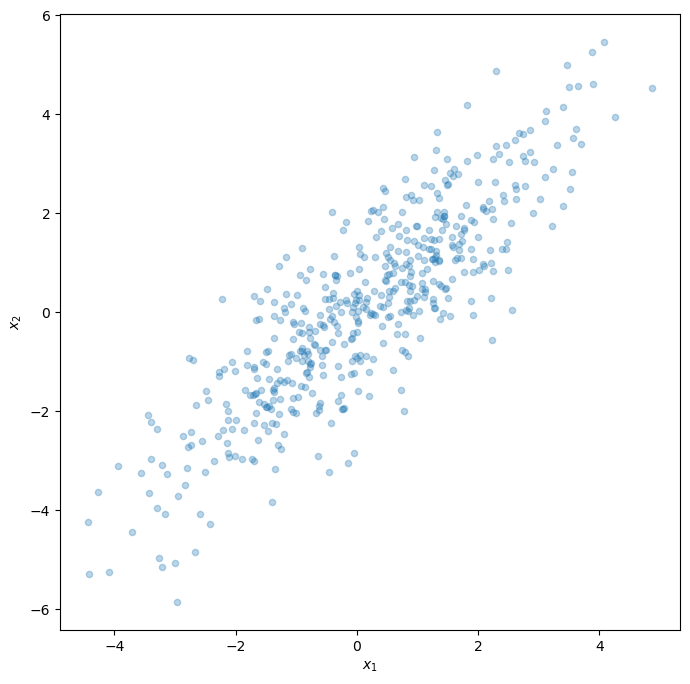

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
data.plot.scatter(x="x1", y="x2", alpha=0.3, ax=ax)
ax.set(xlabel="$x_1$", ylabel=r"$x_2$", title="")
plt.show()

Clearly there is a strong correlation in this data. One could almost predict $y$ using $x$ alone by fitting a line in the $xy$-plane. Therefore, it may be easier to provide a representation on which only one variable is present but retaining the maximum information possible. This is possible using several methods, which rely on several underlying assumptions. Let us start with Principal Component Analysis.

In Principal Component Analysis, we set ourselves the objective of maximizing the variance of the data in our new representation. That is, imagine our new representation is given by $p_1$ and $p_2$ and we define them such that $p$ is a linear combination of $x$. The criteria used to find how to make such a linear combination shall be that the variance of $p_1$ is maximal, when we want to find out how to combine $x_1$ and $x_2$ to obtain $p_1$. This can be similarly done for $p_2$ and any other component. Instead of finding $p$ directly for each sample, we will find the direction $u_1$ on which we should project $x$ using $u_1^T x$ to obtain the new space. As we are only interested in the direction of $u_1$, we define it as normalized vector, so $u_1^T u_1 = 1$.

The mean data value is $\overline{x} = \frac{1}{N} \sum_k x^{(k)}$, where $x^{(k)}$ refers to the vector $(x_1, x_2)$ for the $k$-th sample point. The mean of the projected data in this new dimension $u_1$ is $u_1^T \overline{x}$. The variance of the projected data in the direction $u_1$ is:

$\frac{1}{N}\sum_k\left(u_1^T x^{(k)} - u_1^T \overline{x}\right)^2 = u_1^T S u_1$,

where $S = \frac{1}{N}\left(x^{(k)} - \overline{x}\right)\left(x^{x(k)} - \overline{x}\right)^T$ is the covariance matrix of the data.

We maximize the variance of the data projected in the direction $u_1$, while imposing a restriction on the maximization procedure, such that $u_1$ is normalized to 1. This can be done by maximizing the following function:

$u_1^T S u_1 + \lambda_1 (1 - u_1^T u_1)$,

where $\lambda_1$ is a Lagrange multiplier used to enforce the condition that $u_1^T u_1$ is 1.

Calculating the derivative relative to $u_1$ and setting it to zero to find the maximum we see that:

$S u_1 = \lambda_1 u_1$,

which is an eigenvalue problem! That is, the direction $u_1$, which maximizes the variance of the projected data is the eigenvector of the covariance matrix $S$. Moreover, if we multiply this equation by $u_1^T$ on the left and use $u_1^T u_1 = 1$, we obtain $\lambda_1 = u_1^T S u_1$. That is, $\lambda_1$ is the variance of the data projected in the direction $u_1$.

This gives a simple recipe to find the directions with largest variance: we find the eigenvectors of the covariance matrix $S$ which have highest eigenvalues. By sorting the eigenvalues, we can easily choose which of the directions of the new representations are more important to analyse. We can also discard directions that have low eigenvalues, as they contribute little to the variations observed in the data.

Naturally, we do not need to write the code to perform all those steps, as scikit-learn implements them for us:

In [5]:
pca = PCA(n_components=2)

In [6]:
pca.fit(data.loc[:, ["x1", "x2"]])

PCA(n_components=2)

In [7]:
data_t = pca.transform(data.loc[:, ["x1", "x2"]])

In [8]:
data.loc[:, "pca1"] = data_t[:, 0]
data.loc[:, "pca2"] = data_t[:, 1]

We can start by plotting how the data looks like after this transformation.

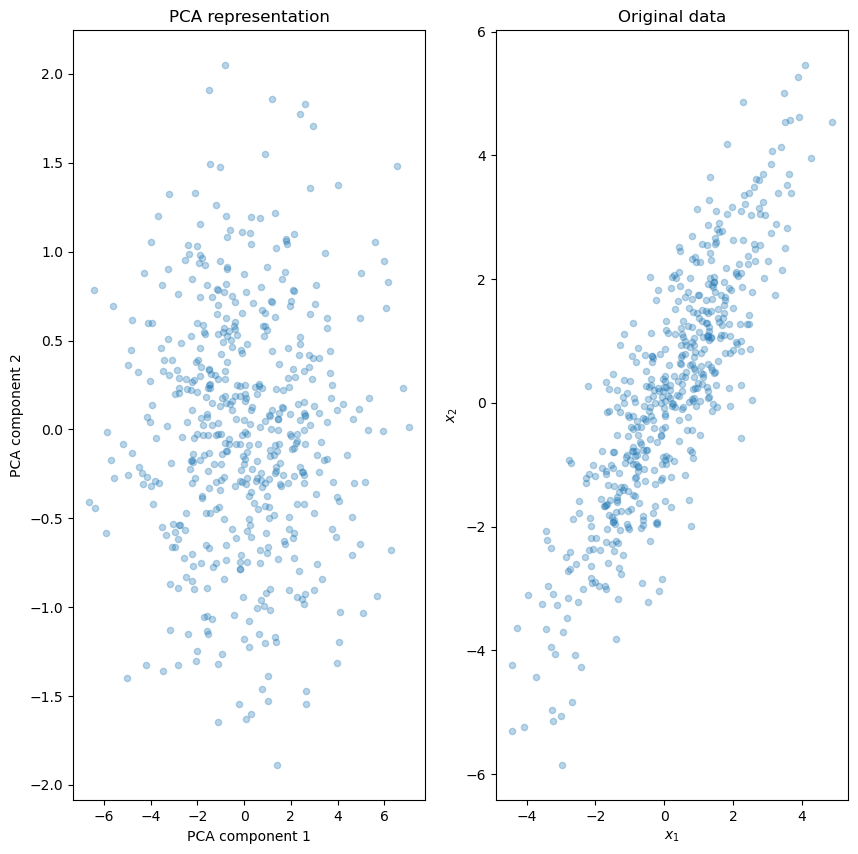

In [9]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=2)
data.plot.scatter(x="pca1", y="pca2", alpha=0.3, ax=ax[0])
data.plot.scatter(x="x1", y="x2", alpha=0.3, ax=ax[1])
ax[0].set(xlabel="PCA component 1", ylabel=r"PCA component 2", title="PCA representation")
ax[1].set(xlabel="$x_1$", ylabel=r"$x_2$", title="Original data")
plt.show()

It is interesting to understand how many PCA components are necessary to explain the variance of the data. This is easily obtainable from the PCA object.

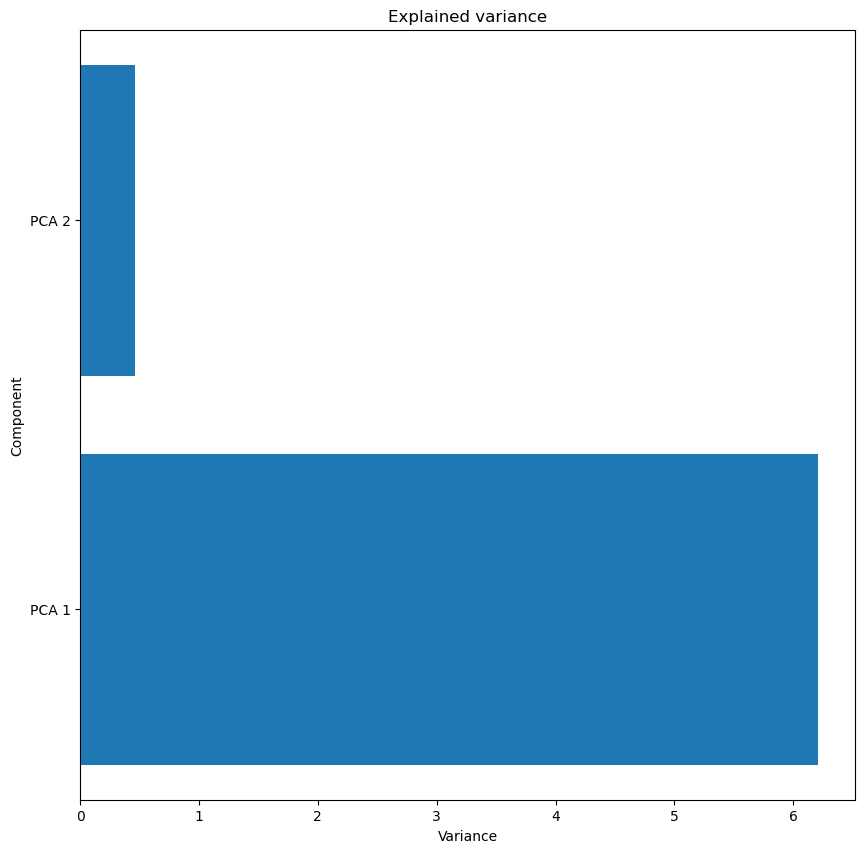

In [10]:
fig = plt.figure(figsize=(10,10))
plt.barh(["PCA 1", "PCA 2"], pca.explained_variance_)
plt.gca().set(xlabel="Variance", ylabel="Component", title="Explained variance")
plt.show()

Clearly the zeroth PCA component holds most of the variance and we could therefore use this component to closely determine where a data sample point should be if we dropped the other component. This is equivalent to fitting a line and using the projection of the point in the line to characterize the data, instead of using the two coordinates.

While this may seem superfluous in this simple case, if one has hundreds of variables, PCA provides a simple and almost automatic way to reduce the amount of features being examined, by concentrating most of the variance in a few variables. Which variables to choose, can be decided from the `explained_variance_` attribute.

## Other representation learning methods

While PCA is a great method for both data visualization and choosing a latent space to condense the information contained in the data, there are many other available, which differ on the assumptions made. Here are some of them and easy-to-read and practical references on how to use them and which assumptions they entail.

  * Kernel PCA: While PCA does a great job at finding the directions where most of the variance is, it focuses on making only *linear* combinations of the features to find the new representation directions. A straightforward method to generalise this idea to non-linear transformations is to apply a non-linear transformation to the data features and after that apply PCA. This is similar to what Kernel PCA does, generalizing the PCA idea. Of course, a non-linearity transformation needs to be chosen for this and this adds extra assumptions in the model. Some more on this can be read here: https://scikit-learn.org/stable/modules/decomposition.html#kernel-pca
  
  * Independent Component Analysis: PCA  looks for the direction containing most of the variance, but this is not always the optimal representation of the data for all goals. In some cases, independence is much more important than decorrelation and this is where the Independent Component Analysis comes in. The ICA also assumes that the new representation can be built from a linear combination of the existing data, but it assumes additionally each observed feature comes from a linear combination of independent latent representations we want to discover. Since independence is a very strong requirement, it is imposed through various different proxy methods. One set of methods focuses on reducing the mutual information (as defined in statistics) between the new features, while an alternative imposes non-Gaussianity requirements on the underlying latent features to be discovered. Since Gaussians do not have statistical moments above the second-order moment (covariance), one can require for example, the fourth order statistical moment (kurtosis) to be maximized in the new representation. More on the scikit-learn implementation can be found here: https://scikit-learn.org/stable/modules/decomposition.html#ica .
  
  * t-SNE embedding: If the objective is only to visualize the data, there are many alternative solutions which focus on reducing the dimensionality of the data into a 2D representation. The t-SNE method assumes that a Gaussian probability can be used to model similarity between data points in N dimensions and that one should maintain that similarity measure when projecting the data in two dimensions, assuming however that the 2D data points' similarity can be represented with a t-Student distribution. Full details on the method can be seen here: https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf It can be easily tried in scikit-learn following the procedure here: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

## Try them out!

Try using t-SNE or Kernel PCA for visualizing the data. Try also getting other data sources to explore how they can be visualized. An example of a data source that you can use to play with would be the dataset of hand-written digits (MNIST), often used for tests in ML. You can obtain them as follows:

In [12]:
from sklearn.datasets import fetch_openml
data, labels = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)